# Introduction to Scikit Learn
This notebook demonstrate some of the useful functions of Scikit Learn
We're going to cover in this section.


0. An end to end workflow
1. Getting our data ready
2. Choose the right algorithm for our data
3. Fit the model/ Algorithm for our model
4. Evaluating a model 
5. Improve the model
6. Save load and trained the model
7. Put it all together

## 0. And end to end work flow

In [52]:
# Get the data ready
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [54]:
# Create X (features matrix (titles of Columns))
heart_disease = pd.read_csv("heart-disease.csv")
x = heart_disease.drop("target",axis=1)
# Create Label Matrix
y = heart_disease["target"]

In [44]:
# Choose the right model / algorithm for a problem whether he has heart_disease or not
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
# We'll keep the default hyperparmeter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
3. # Fit the model for training 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [46]:
clf.fit(x_train, y_train)

RandomForestClassifier()

## Getting data ready to be used in Machine Learning
Three main things we have to do.
     
     1.Split the data into features and labels (usually in 'X' and 'y')
     
     2. Filling and disregarding missing values
     
     3. Converting non numerical values into numerical values ( also called feature decoding)
    

In [53]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
X=heart_disease.drop("target", axis=1)

In [72]:
y= heart_disease["target"]

In [73]:
# Split the data in training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it is all Numerical

In [75]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [94]:
# len(car_sales)
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [80]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [84]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]



0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X , y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [90]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [96]:
# Turn Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [99]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [100]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [109]:
#Let's Refit our Model
np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if we have some missing values?
  1. Fill them with some values also known as imputation
  2. Remove the sample with missing values altogether.

In [114]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [118]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [124]:
# Lets try and convert our data into numbers
# Turn Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [126]:
car_sales_missing
car_sales_missing["Odometer (KM)"].mean()

131253.23789473684

### Option:1 Fill missing data with pandas

In [127]:
# Fill missing "make" column
car_sales_missing["Make"].fillna('missing', inplace=True)
# Fill Colour Column
car_sales_missing["Colour"].fillna('missing', inplace=True)
# Fill "Odometer (km)"
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill "Door Column"
car_sales_missing["Doors"].fillna(4, inplace=True)

# Fill the price Columns


In [130]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [131]:
# Remove the data with missing car values
car_sales_missing.dropna(inplace=True)

In [144]:
car_sales_missing.isna().sum()
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [141]:
from sklearn.model_selection import train_test_split
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
# car_sales_missing

In [143]:
# Lets try and convert our data into numbers
# Turn Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [146]:
## OPtion2: fiill missing data into SKLEARN
car_missing_missing= pd.read_csv("car-sales-extended-missing-data.csv")
car_missing_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [147]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [148]:
car_missing_missing.dropna(subset=["Price"], inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [151]:
# Split into X and y
X = car_missing_missing.drop("Price", axis=1)
y = car_missing_missing["Price"]


In [155]:
# Fill missing values with Sci-kit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical Values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer an fill some missing values
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),("door_imputer",door_imputer,door_features),("num_imputer",num_imputer,num_features)])


# Transform the data =
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [158]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [159]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [163]:
# Turn Categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [165]:
# Now we got our data with numbers and fill with no missing values
# Lets fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## Choosing the right model and estimator for our problem
1. Sklearn refer algorithm, model as estimators
2. Clssification problem is finding category
3. Regression is finding number such as price in our model

if u are confused to for model goto sklearn docs

In [172]:
# Get California Data Set
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [191]:
housing_df = pd.DataFrame(housing["data"], columns = [housing["feature_names"]])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [196]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [210]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [218]:
# Import Alogorithm/ estimators
from sklearn.linear_model import LassoLars



# Setup Random Seed
np.random.seed(42)  # It is used to produce same random number over and over again

# Create Housing Data
X = housing_df.drop("target", axis=1)
y= housing_df["target"] 

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Instantiate and fit the model
model = LassoLars()
model.fit(X_train, y_train)

# Check score of the model (on the test set)
model.score(X_test, y_test)


C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, 

-0.00021908714592466794

## Why not try ensemble model
### Ensemble model is a group of many smaller model to predict the right outcome from the result


In [223]:
# Import RandomForest from model class Ensemble

from sklearn.ensemble import RandomForestRegressor
# setup random seed
np.random.seed(42)

# Fit the model
X = housing_df.drop("target", axis=1)
y= housing_df["target"] 

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Instantiate and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check score of the model (on the test set)
model.score(X_test, y_test)

C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\IP\AppData\Local\Temp/ipykernel_5100/179878255.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warni

0.8065734772187598

## Picking a model for classification model

In [241]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Consulting map and it suggest to try 'linearSVC'

In [226]:
# import linear SVC 
from sklearn.svm import LinearSVC

# Use seed method
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split it into the test and train model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# instantiate linear SVC
clf = LinearSVC()
clf.fit(X_train,y_train)

# Evaluate Model 
clf.score(X_test,y_test)


C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [230]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [232]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Use seed method
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split it into the test and train model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# instantiate RandomForestClassifier 
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate Model 
clf.score(X_test,y_test)


0.8524590163934426

# 3.Fit thee model/ Algorithm on our data and use it to make pridictions.
## 3.1 Fitting the model 

In [233]:
# import Random  
from sklearn.ensemble import RandomForestClassifier

# Use seed method
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

# Split it into the test and train model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# instantiate RandomForestClassifier 
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate Model 
clf.score(X_test,y_test)


0.8524590163934426

## 3.2 Making Pridiction with our own machine learning model

# use a trained model to maeke pridiction
  1. 'predict()'
  2. 'predict_proba()' 



In [238]:
clf.predict(1,1)

TypeError: predict() takes 2 positional arguments but 3 were given

In [239]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [242]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [243]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [244]:
y_pred = clf.predict(X_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [247]:
# Make Prediction with Predic-Proba() return probabillites of classification model
clf.predict_proba(X_train[:5])

array([[0.01, 0.99],
       [0.88, 0.12],
       [0.81, 0.19],
       [0.03, 0.97],
       [0.93, 0.07]])

'Predict' can also be used for regression models.

In [249]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [254]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()
# Create the data
X = housing_df.drop("target",axis=1)
y= housing_df["target"]
# Split the data into X and Y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# fit the model
model.fit(X_train,y_train)
# Score the model according to it
model.score(X_test,y_test)

# predict
y_pred = model.predict(X_test)

C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\IP\AppData\Local\Temp/ipykernel_5100/389101312.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnin

In [255]:
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

## 4.1 Classification model evaluation Matrices

  1. Accuracy 
  2. Area Under ROC Curve
  3. Confusion Matrices
  4. Classification Report

In [257]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## Area Under ROC

In [262]:
# Create X traian and test sets
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


#  imports
from sklearn.metrics import roc_curve
# Fits the classifier
clf.fit(X_train,y_train)

# Make pricdiction with probability
y_probs = clf.predict_proba(X_test)
y_probs[:10]
#

array([[0.83, 0.17],
       [0.55, 0.45],
       [0.91, 0.09],
       [0.03, 0.97],
       [0.13, 0.87],
       [0.05, 0.95],
       [0.39, 0.61],
       [0.82, 0.18],
       [0.01, 0.99],
       [0.53, 0.47]])

In [264]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.17, 0.45, 0.09, 0.97, 0.87, 0.95, 0.61, 0.18, 0.99, 0.47])

In [267]:
# Cal FBR TPR threesholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


# Check the false positive rates

fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.11538462, 0.11538462, 0.15384615, 0.19230769, 0.19230769,
       0.19230769, 0.23076923, 0.42307692, 0.5       , 0.53846154,
       0.53846154, 0.65384615, 0.65384615, 0.73076923, 0.80769231,
       0.88461538, 0.96153846, 1.        ])

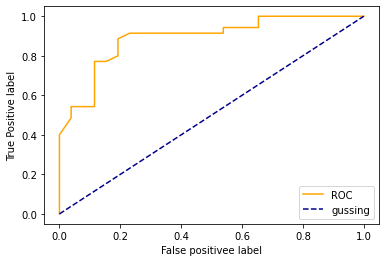

In [271]:
# function for creating plots for fpr and tpr curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot with no curve power
    plt.plot([0,1],[0,1], color="darkblue",linestyle="--", label="gussing")
    plt.xlabel("False positivee label")
    plt.ylabel("True Positive label")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

## ** Confusion Matrics **

Quick way to model predict 

Giving idea where the model confuse

In [273]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 7, 28]], dtype=int64)

In [292]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,21,5
1,7,28


## Creating a confusion matrics with Sci-kit Learn
To use the new method to create confusion method

In [296]:
import sklearn
sklearn.__version__

'1.0.1'

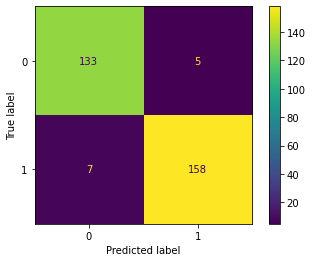

In [298]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

# Classification Report

In [299]:
from sklearn.metrics import classification_report
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [302]:
# Where precision and recall come into play
disease_true = np.zeros(10000)
disease_true[0] = 1 # only positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [304]:
# Regression Model Classification model Evaluation

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train,X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

model =  RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test,y_test)

C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\IP\AppData\Local\Temp/ipykernel_5100/3383875654.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warn

0.8065734772187598

In [307]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [308]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [309]:
y_test.mean()

target    2.055003
dtype: float64

In [311]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [313]:
r2_score(y_test,y_test_mean)

0.0

** Mean Absolute Error(MAE) **


It gives you the mean of difference of actual model and predicted model.


It gives you idea how bad is your prediction

In [315]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)
mae

C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.32659871732073664

In [326]:
df = pd.DataFrame({"actual Value": y_test, "predicted value": y_preds})


ValueError: Data must be 1-dimensional

## 4.2.3 Finally Using scoring Parameter

In [327]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()



In [329]:
np.random.seed(42)

# Cross Validation Accuracy

cv_acc = cross_val_score(clf, X, y , cv=5, scoring=None)

In [346]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X and Y
X = heart_disease.drop("target", axis=1)
y= heart_diease["target"]

# Split it into train and test

X_train,X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)
y_preds = model.predict(X_test)
y_preds

pre = precision_score(y_test, y_preds)
pre

0.8484848484848485

In [341]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y= housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)



C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\IP\AppData\Local\Temp/ipykernel_5100/1264276367.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\IP\Desktop\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warn

0.8065734772187598

# Improve the model

> Collect more data
> First Prediction = Baseline prediction
> First Model = baseline Model

Could we improve our model

Is there any good model we can have

# Improving our model with hyper Parameter
Three ways to tune our model


1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [347]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning HyperPArameter 'BY Hand'

Lets make 3 sets training, Validation and test

In [351]:
## Hyperparameter tunning with RandomizeSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10,100,200,500,1000,1200],"max_depth":[None, 5, 10, 20, 30], "max_features": ["auto", "sqrt"], "min_samples_split":[2,4,6],"min_samples_leaf":[1 , 2, 4]}
np.random.seed(42)

X = 

In [356]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [358]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps
1. Fill missing data
2. Convert this in numbers
3. Build machine learing 

In [361]:
# Getting our data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling our data

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup Random Seed
import numpy as np
np.random.seed(42)

# Import Data and drop missing columns
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and form different pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing"),
    ("onehot", OneHotEncoder(handle_unknown="ignore")))]
)
door_feature = ["Door"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value = 4))])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy="mean"))])

# Setup Preprocessing Set (fill missing value and convert into numbers)

preprocessor = ColumnTransformer(transformers=[("cat",categorical_transformer, categorical_features),
                                                ("door", door_transformer, door_features),
                                               ( "num", numeric_transformer, num_features)])

# Create Preprocssing pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", RandomForestRegressor())])

# Split Data 
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the model

model.fit(X_train, y_train)
model.score(X_test, y_test)




ValueError: too many values to unpack (expected 2)